In [1]:
import os 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm

## 資料前處理

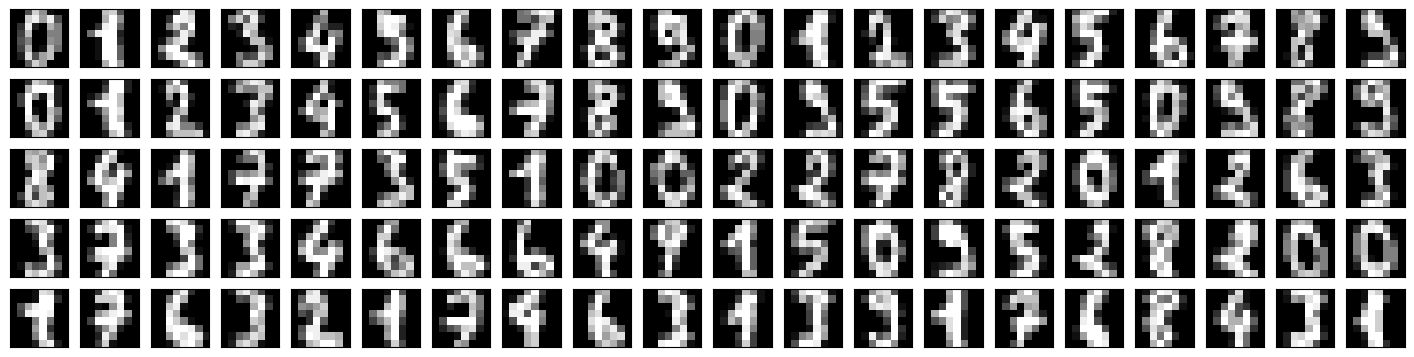

In [2]:
from sklearn.datasets import load_digits
"""download the mnist dataset"""
digits = load_digits()
"""let dataset storing in variables"""
X = digits.data/16
"""data processing。。。"""
Y = digits.target
"""get datasets' labels"""
plt.rcParams["figure.figsize"] = (18,18)
"""let image in range 18X18"""
plt.gray()
"""let image become gray"""
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show()

## 計算每筆data的鄰居

In [8]:
def euclidean_distance(dataA , dataB) : 
    distance = 0
    for Xi1 , Xi2 in zip(dataA , dataB) : 
        distance += (Xi1 - Xi2)**2
    return distance**(1/2)

def NearistNeighbor(data , range) : 
    Neighbors = []
    for X in data : 
        X_Neighbors = []
        for i , x in enumerate(data) : 
            distance = euclidean_distance(X , x) 
            if len(X_Neighbors) < range : 
                X_Neighbors.append([i , x , distance])
            else : 
                for i , neighbor in enumerate(X_Neighbors) : 
                    if distance < neighbor[2] and distance != 0 : 
                        X_Neighbors[i]=[i, x, distance]
                    break
        Neighbors.append(X_Neighbors)
    return Neighbors

In [9]:
N , M = X.shape
"""N : array X's width  M : array X's height"""
NeighborsAmount = 30
"""sample range of neighbor data"""
neighbors = NearistNeighbor(X , NeighborsAmount)